In [ ]:
#dataset:https://www.kaggle.com/deyritwik/bank-loan

In [35]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df=pd.read_csv('BankPLoan.csv')

In [37]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [38]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [39]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [43]:
df.shape

(5000, 14)

In [41]:
df.apply(lambda x:sum(x.isnull()))

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

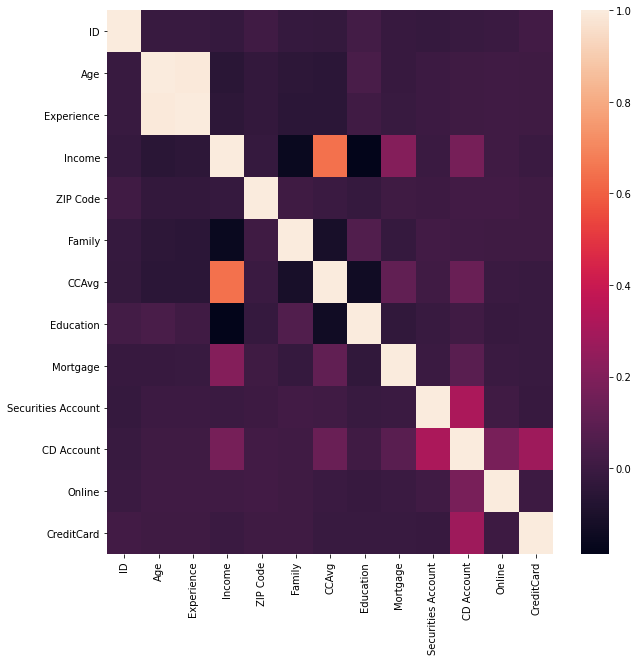

In [45]:

df1 = df.drop('Personal Loan',axis=1)
df1.shape
df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr())

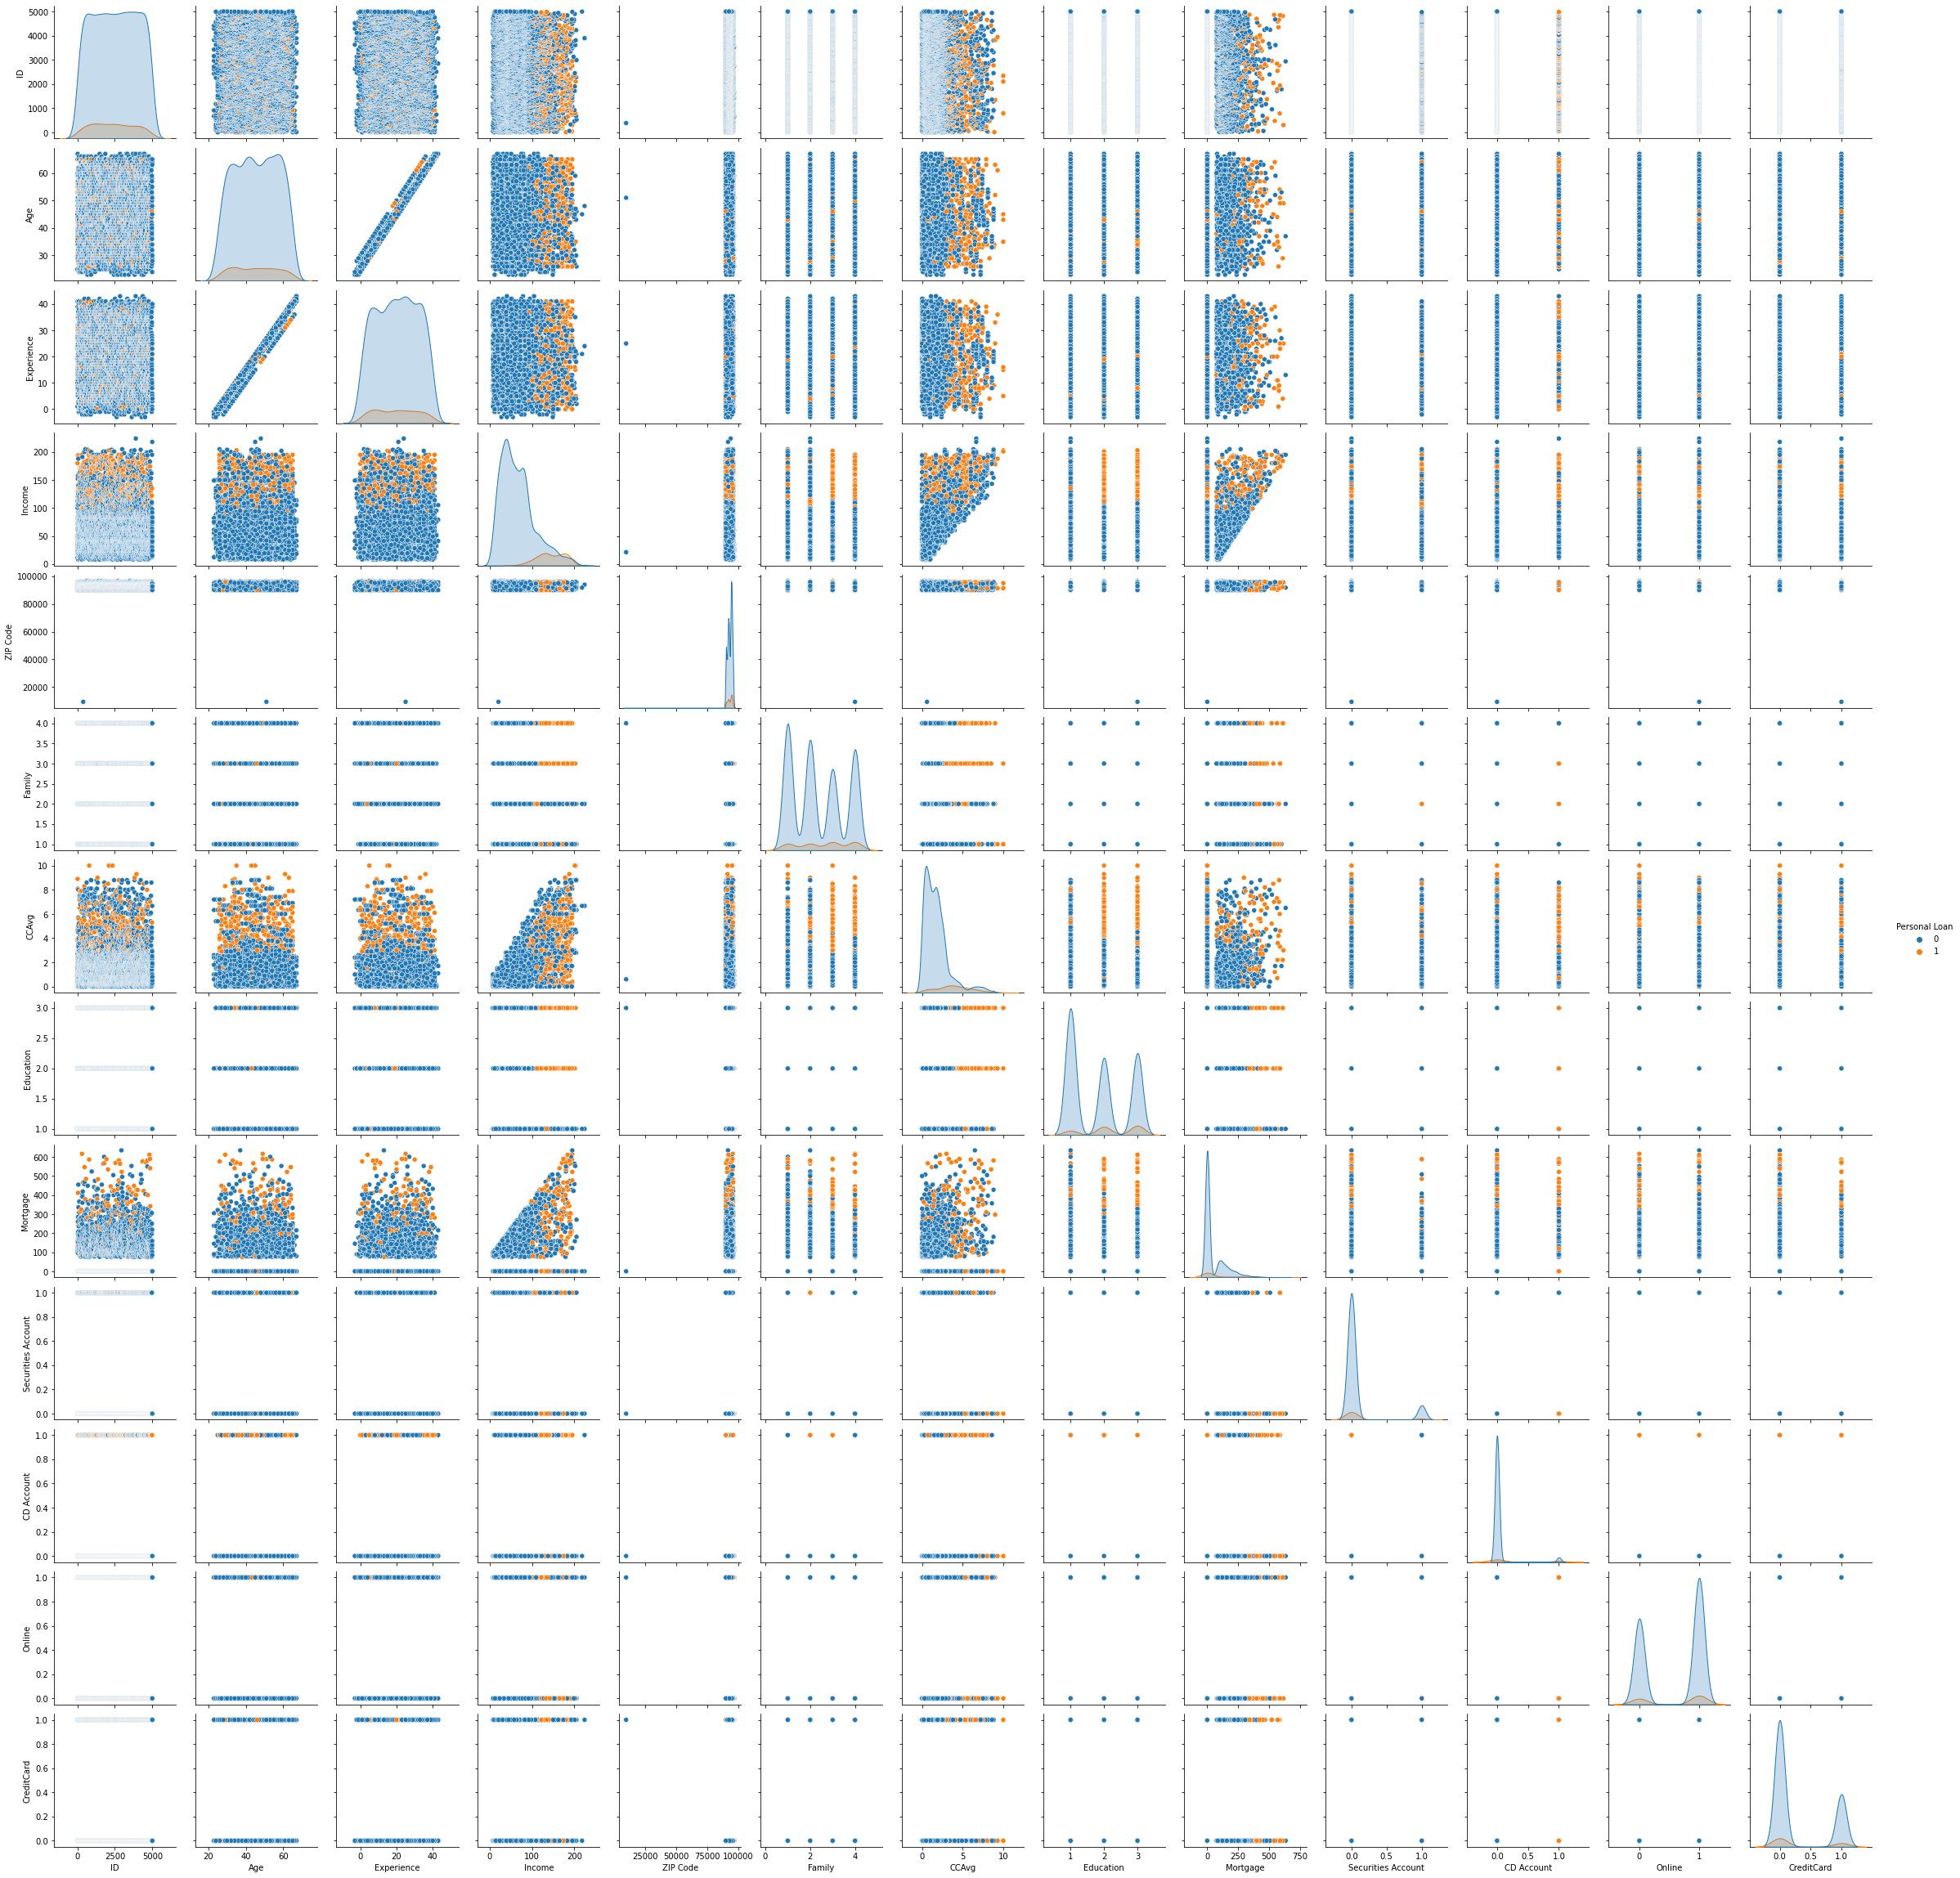

In [46]:
sns.pairplot(data=df,hue='Personal Loan')
plt.show()

In [47]:
print("No of customers who have negative experience is {}".format((df[df['Experience']<0]).shape[0]))

No of customers who have negative experience is 52


In [48]:
df['Experience'] = df['Experience'].apply(lambda x : abs(x) if(x<0) else x)

In [49]:
print("No of customers who have negative experience is {}".format((df[df['Experience']<0]).shape[0]))

No of customers who have negative experience is 0


In [50]:
#Now ID and pincode/zip code has no effect on the prediction so we are going to drop these values
df.drop(['ID','ZIP Code'],axis=1,inplace=True)

In [51]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [52]:
df.shape

(5000, 12)

In [53]:
X = df.drop('Personal Loan',axis=1)
y = df['Personal Loan']

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [55]:
print(X_train.shape)

(3500, 11)


In [56]:
print(y_test.shape)

(1500,)


In [57]:
from sklearn.naive_bayes import CategoricalNB
cnb = CategoricalNB()
cnb.fit(X_train,y_train)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

In [58]:
y_pred=cnb.predict(X_test)

In [59]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
y_test

398     0
3833    0
4836    0
4572    0
636     0
       ..
4554    0
4807    0
1073    0
2906    0
1357    0
Name: Personal Loan, Length: 1500, dtype: int64

In [61]:
print("NO of mislabeled pts out of total points %d: %r"%(X_test.shape[0],y_test!=y_pred))

NO of mislabeled pts out of total points 1500: 398     False
3833    False
4836    False
4572    False
636     False
        ...  
4554    False
4807    False
1073    False
2906    False
1357    False
Name: Personal Loan, Length: 1500, dtype: bool


In [62]:
from sklearn import metrics
print("Accuracy is :",metrics.accuracy_score(y_test,y_pred))

Accuracy is : 0.942


In [63]:
print("Confusion Matrix is :",metrics.confusion_matrix(y_test,y_pred))

Confusion Matrix is : [[1351   21]
 [  66   62]]


In [65]:
print("precision is :",metrics.precision_score(y_test,y_pred))
print("recall is :",metrics.recall_score(y_test,y_pred))
print("f1 score is :",metrics.f1_score(y_test,y_pred))

precision: 0.7469879518072289
recall   : 0.484375
f1 score : 0.5876777251184835
